# Chapter 1

`Aer` is one of many importable *providers*.

`Aer` *provides* the interface to an ideal, simulated quantum computer. 

A `backend` is one of these ideal, simulated quantum computers.

An ideal (nosie free) QC is a classical computer *simulating what a quantum computer would do*.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit_textbook.widgets import binary_widget

from math import sqrt, pi

# Ch 1.2

In this section, we explored classical bits, circuits, and computing. We learned the basic workflow for simulating circuits with Qiskit and solved (classical) example problems by writing programs with Qiskit.

## Quick Exercises
1. Think of a number and try to write it down in binary.

`binary_widget` can be used to test your answers for this exercise

In [2]:
# Create an interactive exercise
# Exercise:  Attempt to write a number in binary from 0 to 2^nbits
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

## Quick Exercises Cont'd
2. If you have n bits, how many different states can they be in?

For a binary numbering system and n bits there are a total of `2^n` possible states.
That's why for Quick Exercise 1 (`nbits=5`) the options are 0 to 31 (32 total options).

The basic **quantum circuit** workflow is:
1. Encode the input
2. Perform computation
3. Interpret the output

In [3]:
# Create a quantum circuit with 8 qubits in |0>
qc_output = QuantumCircuit(8)
# Draw the initial circuit diagram
qc_output.draw(initial_state=True) # Circuit diagram will display initial state of the qubits


q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
q_3: |0>
        
q_4: |0>
        
q_5: |0>
        
q_6: |0>
        
q_7: |0>

`measure_all()` will automatically create a classical register to store the results

In [4]:
# Measure all the qubits in the qc from above
qc_output.measure_all()
# Draw the circuit diagram again. Note the measurement operations are shown, too!
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

In [5]:
# Create a new simulator (backend object)
sim = Aer.get_backend("aer_simulator")
# Run the circuit on an ideal QC and then collect the count statistics
result = sim.run(qc_output).result() # Result uses little endian formatting
type(result)

qiskit.result.result.Result

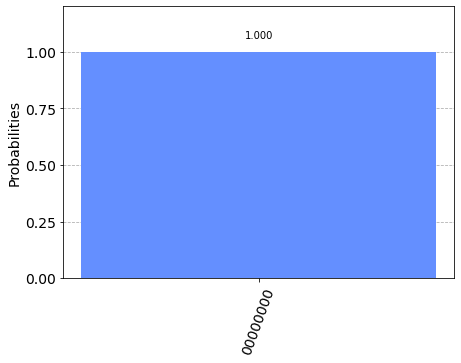

In [6]:
# Passing a QuantumCircuit to get_counts provides the index of the experiment
# I think this will be useful when you have multiple circuits
counts = result.get_counts(qc_output)
# 100% of the time we will measure all eight qubits in the 0 state
# |00000000>
plot_histogram(counts)

## Ch 1.2.4

In [7]:
# Create a QC with 8 qubits. Then, NOT the 8th qubit

# The new circuit will encode some "useful" information
qc_encode = QuantumCircuit(8)
# NOT the 8th qubit
qc_encode.x(7)
qc_encode.draw(initial_state=True)

q_0: |0>─────
             
q_1: |0>─────
             
q_2: |0>─────
             
q_3: |0>─────
             
q_4: |0>─────
             
q_5: |0>─────
             
q_6: |0>─────
        ┌───┐
q_7: |0>┤ X ├
        └───┘

In [8]:
# Measure all the qubits
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

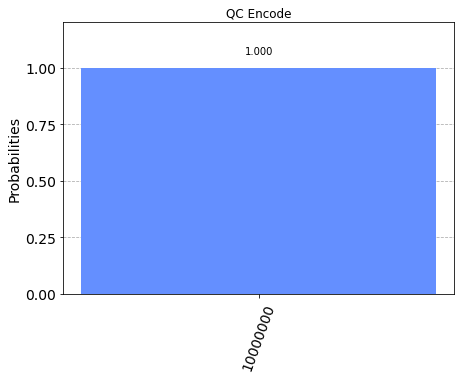

In [9]:
# Create a new simulator (shadow the old one, for now)
sim = Aer.get_backend("aer_simulator")
# Run the encode QC on the simulator THEN create a results object from that simulation
encode_results = sim.run(qc_encode).result()
# Access the counts attribute of the Results 
counts = encode_results.get_counts(qc_encode)
# Plot the counts
plot_histogram(counts, title="QC Encode")

## Exercise:  Write a string representing your age from the counts of a QC

25 in binary (little endian) is 1 + 8 + 16 = 2^0 + 2^3 + 2^4 .:.

25 = 00011001

In [10]:
# Create a quantum circuit with 8 qubits
age_qc = QuantumCircuit(8)
# Select the qubits that need to be flipped on
on_bits = [0, 3, 4]
# Apply a NOT gate to the specified qubits
for bit in on_bits:
    age_qc.x(bit)
# Measure the results of the circuit
age_qc.measure_all()
# Draw for debugging
age_qc.draw(initial_state=True)

┌───┐ ░ ┌─┐                     
  q_0: |0>┤ X ├─░─┤M├─────────────────────
          └───┘ ░ └╥┘┌─┐                  
  q_1: |0>──────░──╫─┤M├──────────────────
                ░  ║ └╥┘┌─┐               
  q_2: |0>──────░──╫──╫─┤M├───────────────
          ┌───┐ ░  ║  ║ └╥┘┌─┐            
  q_3: |0>┤ X ├─░──╫──╫──╫─┤M├────────────
          ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>┤ X ├─░──╫──╫──╫──╫─┤M├─────────
          └───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>──────░──╫──╫──╫──╫──╫─┤M├──────
                ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>──────░──╫──╫──╫──╫──╫──╫─┤M├───
                ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
                ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7

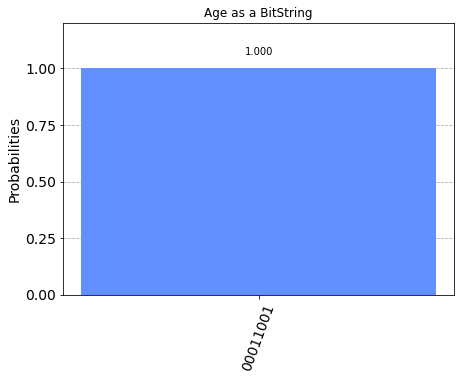

In [11]:
# Create a simulator
age_sim = Aer.get_backend("aer_simulator")
# Run the qc
age_result = age_sim.run(age_qc).result()
# Interpret the results as counts
age_string = age_result.get_counts(age_qc)
# Plot the counts
plot_histogram(age_string, title="Age as a BitString")

## Create a half-adder circuit

Try this exercise on your own before walking through the textbook implementation

We already know that a half-adder is just a circuit that takes 2 bits and outputs at most 2 other bits. So, we might expect that this circuit should have 2 input and 2 outputs, telling us we need to initialize a 4 qubit qc.

Then, we looked at the truth table for a half-adder. Both the |10> and |01> states "target" the same qubit, according to their results; that is, both states output |01>. So we might control the rightmost qubit on either inputs being |1>. Then, for the |11> case, we simply target the other qubit.
If we use only CNOT, then the |00> case takes care of itself.

Finally, we know that only the last 2 qubits are giving us our "answer". So, we should measure those.

Hint:  The rightmost bit is always NOT(are the inputs the same?)

Classical **XOR** is Quantum **CNOT**

In [12]:
# Initialize 4 Qubits, 2 Classical Bit
half_adder = QuantumCircuit(4,2)

# Adding program - Defaults to |00> input
## Uncomment for other types of input
# |10>
#half_adder.x(0)

# |01>
half_adder.x(1)

# |11>
#half_adder.x([0, 1])
half_adder.barrier()

half_adder.cx(0, 2)
half_adder.cx(1, 2)
half_adder.ccx(0, 1, 3)

# Measure the 2th and 3th qubit
half_adder.barrier()
half_adder.measure(2, 0)
half_adder.measure(3, 1)
half_adder.draw(initial_state=True)

░                 ░       
q_0: |0>──────░───■─────────■───░───────
        ┌───┐ ░   │         │   ░       
q_1: |0>┤ X ├─░───┼────■────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├──┼───░─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: |0>──────░───────────┤ X ├─░──╫─┤M├
              ░           └───┘ ░  ║ └╥┘
 c: 0 2/═══════════════════════════╩══╩═
                                   0  1

Passing `Qobj` to `simulator.run(Qobj)` means we don't need to call `get_counts(experiment/QuantumCircuit...)`

Create a `Qobj` by *assembling* a QC

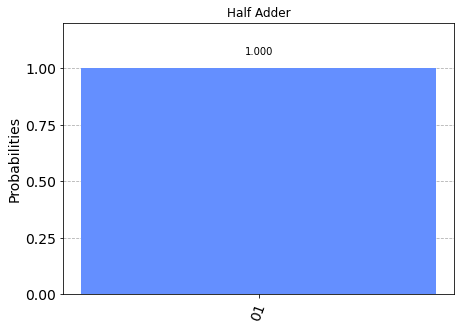

In [13]:
half_adder_sim = Aer.get_backend("aer_simulator")
# "Assemble a quantum assembly (language) object"
# This can be passed into run(...)
qobj = assemble(half_adder)
# By passing a Qobj to run, we don't need to call the `experiment` param inside of get_counts()
half_adder_counts = half_adder_sim.run(qobj).result().get_counts()
plot_histogram(half_adder_counts, title="Half Adder")

# Ch 1.3

The `initialize` method can be a great way to apply a state to a qubit without having to do a bunch of set up inside of the circuit itself. 

So in the following example, I would have to add add a NOT gate to the qubit. That seems like kind of a waste when I just want to initialize the state. Especially in the case of many qubits with more complicated states.

Instead, I can basically preprocess that task with the `initialize` method and progromatically apply it to my qubits. 

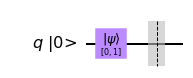

In [14]:
# Example of using initialize

# Transpose of |1> state
initial_state = [0, 1]

qc = QuantumCircuit(1)
# Target the 0th qubit to be |1>
qc.initialize(initial_state, 0)
# Tell the simulator to save the state vector
qc.save_statevector()
qc.draw(initial_state=True, output="mpl")


In [15]:
sim = Aer.get_backend("aer_simulator")
qobj = assemble(qc)
result = sim.run(qobj).result()
# Read the output state vector as a complex number
out_state = result.get_statevector()
print(f"Final Statevector:  {out_state}")

Final Statevector:  Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


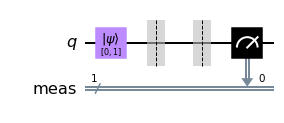

In [17]:
qc.measure_all()
qc.draw(output="mpl")

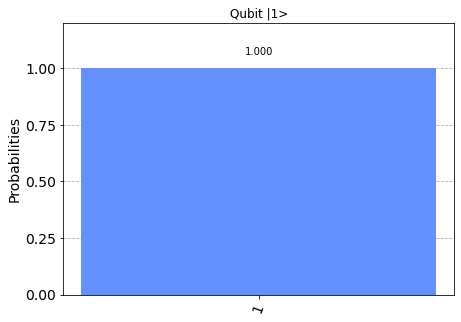

In [19]:
counts = result.get_counts()
plot_histogram(counts, title="Qubit |1>")

What happens if we don't tell the simulator to save the state vector?

In [16]:
# Uncomment to view the result of this side test

# # Transpose of |0> just for fun
# initial_state = [1,0]
# # Set up the QC
# testqc = QuantumCircuit(1)
# # Target the 0th qubit for the initial state
# testqc.initialize(initial_state, 0)
# # Explicitly forget to tell the simulator to save the state vector
# # Assemble the circuit as a list of QASM instructions
# qobj = assemble(testqc)
# # Try to get the state vector 
# testresult = sim.run(qobj).result()
# testsv = testresult.get_statevector()

If we do not tell the simulator to save the state vector, we get a `QiskitError`.

Let's put the qubit in a superposition of states. Then, get the statevector and plot the histogram. Can you guess how to plot the bloch sphere?

**Question** "When" do you provide the instruction to save the statevector?

Correct:  After initializing its state!

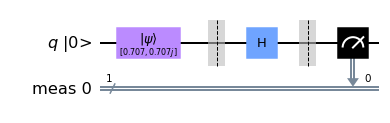

In [32]:
# Transpose of |+>
initial_state = [1/sqrt(2), 1j/sqrt(2)]

# Create our boring circuit
sup_qc = QuantumCircuit(1)
# Initialize the state of the 0th qubit
sup_qc.initialize(initial_state)
# Tell the simulator to save the state vector
sup_qc.save_statevector()
# Put the qubit in a superposition
sup_qc.h(0)
sup_qc.measure_all()
sup_qc.draw(output="mpl", initial_state=True)


Intiial State: [0.7071067811865475, 0.7071067811865475j]
Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


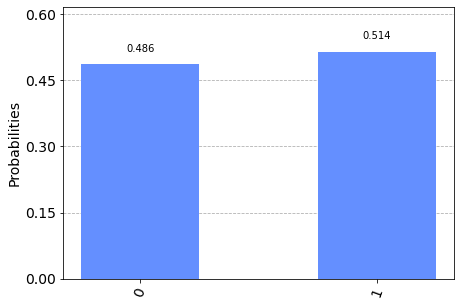

In [33]:

# Assemble the qc (QASM)
qobj = assemble(sup_qc)

# Set up the simulator
sup_sim = Aer.get_backend("aer_simulator")
# Statevector is an attribute of Results
sup_results = sup_sim.run(qobj).result()
sup_statevec = sup_results.get_statevector()
print(f"Intiial State: {initial_state}\n{sup_statevec}")

# Counts also comes from Result
sup_counts = sup_results.get_counts()
plot_histogram(sup_counts)